# Sample code for Assignment 2

## Simple experiments for the standard (normalized) diabetes; Questions 1-3

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.data.shape

(442, 10)

In [2]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [3]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(diabetes.data, diabetes.target, random_state=0)
lr = LinearRegression().fit(X_train_sk,y_train_sk)
lr.score(X_train_sk, y_train_sk)

0.555437148935302

(It is not in the assignment, but as a sanity check I am also computing results for Least Squares.)

In [5]:
lr.score(X_test_sk, y_test_sk)

0.35940090989715556

In [6]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_sk,y_train_sk)
lasso.score(X_train_sk,y_train_sk)

0.41412544493966097

In [7]:
lasso.score(X_test_sk,y_test_sk)

0.27817828862078764

In [8]:
import numpy as np
np.sum(lasso.coef_ != 0)

2

In [9]:
lasso.coef_

array([  0.        ,  -0.        , 442.67992538,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       330.76014648,   0.        ])

## Simple experiments for the original diabetes; Questions 4-6

In [10]:
X = np.genfromtxt('diabetes.data',skip_header=1,usecols=range(10))

In [11]:
X.shape

(442, 10)

In [12]:
X[:2]

array([[ 59.    ,   2.    ,  32.1   , 101.    , 157.    ,  93.2   ,
         38.    ,   4.    ,   4.8598,  87.    ],
       [ 48.    ,   1.    ,  21.6   ,  87.    , 183.    , 103.2   ,
         70.    ,   3.    ,   3.8918,  69.    ]])

In [13]:
y = np.genfromtxt('diabetes.data',skip_header=1,usecols=10)

In [14]:
y[:2]

array([151.,  75.])

In [15]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train_orig,y_train)
lr.score(X_train_orig, y_train)

0.5554337250189862

In [16]:
lr.score(X_test_orig, y_test)

0.35940880381777096

In [17]:
lasso = Lasso().fit(X_train_orig,y_train)
lasso.score(X_train_orig,y_train)

0.5495927275220448

In [18]:
lasso.score(X_test_orig,y_test)

0.3426973018813806

In [19]:
np.sum(lasso.coef_ != 0)

9

In [20]:
lasso.coef_

array([ -0.1256873 , -14.66777611,   6.6827205 ,   1.00125059,
         0.33753565,  -0.54918943,  -1.38498537,   0.        ,
        32.38598456,   0.15747148])

The results of prediction for the unnormalized dataset are surprisingly good.  But the number of non-zero parameters is awful.

## Preprocessing and simple experiments; Questions 7-8

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_orig)
X_train = scaler.transform(X_train_orig)
X_test = scaler.transform(X_test_orig)
lr = LinearRegression().fit(X_train,y_train)
lr.score(X_train, y_train)

0.5554337250189862

In [22]:
lr.score(X_test, y_test)

0.35940880381777074

In [23]:
lasso = Lasso().fit(X_train,y_train)
lasso.score(X_train,y_train)

0.5526887951164521

In [24]:
lasso.score(X_test,y_test)

0.35568534330098744

In [25]:
np.sum(lasso.coef_ != 0)

8

In [26]:
lasso.coef_

array([ -0.44798806,  -8.0359924 ,  28.92971975,  12.66159728,
        -6.78401285,  -0.        , -10.1748259 ,   0.        ,
        27.41046535,   0.4841559 ])

The results look anomalous, since they are closer to what we had for the original dataset than for the scikit-learn normalized version.  To understand why, let's look at the first sample in all three datasets (normalized by scikit-learn, original, and normalized by us).

In [27]:
print(X_test_sk[0])
print(X_test_orig[0])
print(X_test[0])

[ 0.01991321  0.05068012  0.10480869  0.07007254 -0.03596778 -0.0266789
 -0.02499266 -0.00259226  0.00371174  0.04034337]
[ 54.       2.      36.1    115.     163.      98.4     43.       4.
   4.6821 101.    ]
[ 0.4139419   1.0400774   2.18176051  1.50055268 -0.74420294 -0.54010732
 -0.51906901 -0.06536601  0.07775296  0.80622756]


We can see that the first and third datasets are very different; the first has much smaller entries.  Remember the note in the description (diabetes.DESCR) of this dataset: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e., the sum of squares of each column totals 1).  Let us check if we get similar results if we do the scikit-learn's alternative normalization.

In [28]:
X_train_442 = X_train / np.sqrt(442)
X_test_442 = X_test / np.sqrt(442)

In [29]:
lasso = Lasso().fit(X_train_442,y_train)
lasso.score(X_train_442,y_train)

0.4092192241478434

In [30]:
lasso.score(X_test_442,y_test)

0.27548240879080854

In [31]:
np.sum(lasso.coef_ != 0)

2

In [32]:
lasso.coef_

array([  0.        ,  -0.        , 447.80297025,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       329.9482957 ,   0.        ])

The difference is not so big anymore.  For our normalization using StandardScaler, we need to use a different value of alpha to achieve the same result (and the default value alpha=1 gives a very different result).

##  Plots and parameter selection; Questions 9-10

Let me first do some experiments with Lasso for different values of alpha to get an idea of a reasonable range for alpha.

In [33]:
lasso = Lasso(alpha=20,max_iter=100000).fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(np.sum(lasso.coef_ != 0))

0.4184573667612983
2


In [34]:
alphas = np.array([0.1, 0.5, 1, 2, 5, 10, 20]) # the alphas to try
k = alphas.size  # the number of alphas
scores = np.zeros(k)  # initializing the score (R^2) for each alpha
used = np.zeros(k)  # initializing the number of used feaures for each alpha
for i in range(k):
  lasso = Lasso(alpha=alphas[i],max_iter=100000).fit(X_train,y_train)
  scores[i] = lasso.score(X_test, y_test)
  used[i] = np.sum(lasso.coef_ != 0)

Now we can do the scatterplot.

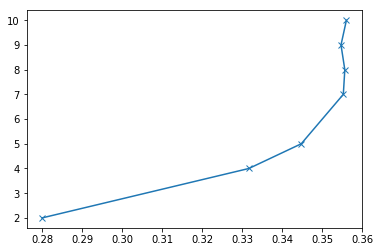

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(scores, used, marker='x')

The model with 7 features looks best to me.

Let us now select a good alpha using cross validation.

In [36]:
param_grid = {'alpha': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

0.3553116624481605

This is the test set $R^2$.  The training set $R^2$ is computed as follows:

In [37]:
grid_search.score(X_train, y_train)

0.5487049188413291

It is significantly higher.

Now let us find the number of features used.

In [38]:
print(np.sum(grid_search.best_estimator_.coef_ != 0))

7


## Inductive conformal predictor; Question 11

Let's start by creating scaled training set proper, calibration set, and test set.

In [39]:
m = 99  # the size of the calibration set
X_train_proper_orig, X_calib_orig, y_train_proper, y_calib = train_test_split(X_train_orig, y_train,
  train_size=None, test_size=m, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train_proper_orig)
X_train_proper = scaler.transform(X_train_proper_orig)
X_calib = scaler.transform(X_calib_orig)
X_test = scaler.transform(X_test_orig)  # redefining the array X_test

Next we train Lasso on the training set proper and check if all nonconformity scores are really different (as we assume in this course).

In [40]:
param_grid = {'alpha': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X_train_proper, y_train_proper)
y_calib_hat = grid_search.predict(X_calib)
nonconformity_scores = abs(y_calib-y_calib_hat)
print(np.sort(nonconformity_scores))

[  0.67897888   2.90537324   4.41884166   5.8577551    7.04261553
   8.03564244   8.18482052   8.89303049   9.81802632  11.45626349
  12.9402916   13.08992619  13.14935049  13.36004097  13.37666661
  14.4169697   16.34073661  16.61639234  17.25577984  17.30649255
  17.40677173  17.89928189  18.16636253  18.51914439  19.05669219
  19.17249806  19.5164231   20.70781846  20.71567549  20.74477611
  21.46754527  21.70112929  22.14853207  23.54719507  24.14159395
  25.2332439   25.61249722  26.11762163  27.76600844  28.2053686
  28.4679197   31.72199259  34.32556632  35.10309136  35.48674733
  36.03794673  37.72329012  38.21012313  38.86563489  39.11167714
  39.39897592  39.75746672  40.20515034  40.40104668  42.53742936
  42.8090496   43.57055248  44.27300443  44.91135581  44.96827384
  45.96381275  46.82426451  47.52567774  47.75648103  48.94604573
  49.41586823  49.61862585  52.24656596  53.44455048  53.97244353
  56.62955681  58.23457613  62.00991823  64.48857974  65.60963059
  70.301497

Let us find the length of prediction intervals at significance levels 5 and 20:

In [41]:
length_5 = np.sort(nonconformity_scores)[m - int(np.floor(0.05*(m+1)))]
length_20 = np.sort(nonconformity_scores)[m - int(np.floor(0.20*(m+1)))]
print(length_5, length_20)

113.09540672358543 76.03955300749016


Now we can find the percentages of errors on the test set:

In [42]:
n_errors_5 = 0  # number of errors at 5%
n_errors_20 = 0  # number of errors at 20%
y_test_hat = grid_search.predict(X_test)  # predictions for the test samples
for j in range(y_test.size):
  if abs(y_test[j]-y_test_hat[j]) > length_5:
    n_errors_5 = n_errors_5 + 1
  if abs(y_test[j]-y_test_hat[j]) > length_20:
    n_errors_20 = n_errors_20 + 1
print("Test error rate at 5%:", n_errors_5 / y_test.size)
print("Test error rate at 20%:", n_errors_20 / y_test.size)

Test error rate at 5%: 0.04504504504504504
Test error rate at 20%: 0.18018018018018017
